# Fairness

In [1]:
from mentat import *
import pandas as pd
import seaborn as sns

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
data = pd.read_csv("../data/credit-bias-predictions.zip")
data.head()

,NewCreditCustomer,Amount,Interest,LoanDuration,Education,NrOfDependants,EmploymentDurationCurrentEmployer,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,...,Other,Owner,Owner_with_encumbrance,Tenant,Entrepreneur,Fully,Partially,Retiree,Self_employed,predicted_probabilities
0,False,530.0,10.68,36,4.0,NaN,5.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.662289
1,False,530.0,21.57,24,4.0,NaN,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.749224
2,False,2300.0,15.62,36,4.0,0.0,6.0,1159.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.775058
3,True,530.0,27.36,36,4.0,NaN,6.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0.423509
4,True,4250.0,18.94,60,4.0,NaN,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.535847


In [3]:
data['PaidLoan'] = data.PaidLoan.astype(int)

In [4]:
priviledged = data[data.Education == 5.0][['PaidLoan', 'predicted_probabilities']]
ed_4 = data[data.Education == 4.0][['PaidLoan', 'predicted_probabilities']]
ed_3 = data[data.Education == 3.0][['PaidLoan', 'predicted_probabilities']]
ed_1 = data[data.Education == 1.0][['PaidLoan', 'predicted_probabilities']]

In [5]:
from metrics import Fairness

fairness = Fairness.create("Education Level 5", list(priviledged.PaidLoan), list(priviledged.predicted_probabilities)) 

In [6]:
fairness.addProtectedGroup("Education Level 4", list(ed_4.PaidLoan), list(ed_4.predicted_probabilities)) 
fairness.addProtectedGroup("Education Level 3", list(ed_3.PaidLoan), list(ed_3.predicted_probabilities)) 
fairness.addProtectedGroup("Education Level 1", list(ed_1.PaidLoan), list(ed_1.predicted_probabilities)) 

In [7]:
fairness.check()

In [8]:
from matplotlib import pyplot as plt

def plotMetric(x, y, title):
    graph = sns.barplot(x=x, y=y, color='red')
    graph.set(title=title)
    graph.axvline(fairness.getEpsilon(), linestyle="--", c='k')
    graph.axvline(1.0/fairness.getEpsilon(), linestyle="--", c='k') 

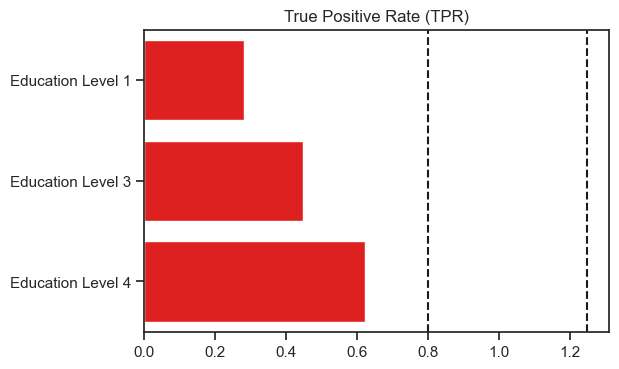

In [12]:
y = [str(f) for f in list(fairness.getTPR().keys())]
x = [float(f) for f in list(fairness.getTPR().values())]

plotMetric(x, y, "True Positive Rate (TPR)")

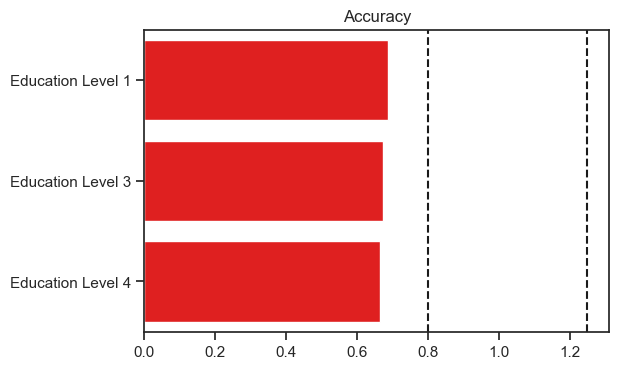

In [10]:
y = [str(f) for f in list(fairness.getAccuracy().keys())]
x = [float(f) for f in list(fairness.getAccuracy().values())]

plotMetric(x, y, "Accuracy")

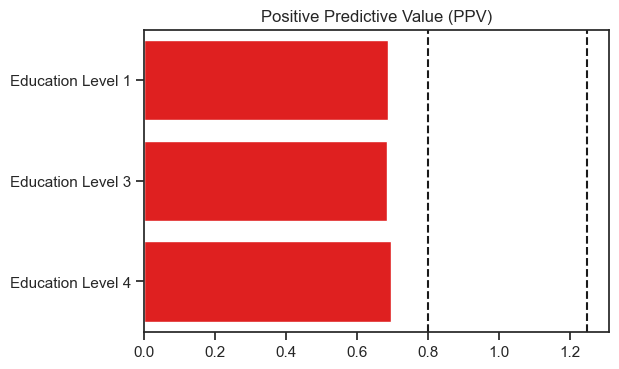

In [13]:
y = [str(f) for f in list(fairness.getPPV().keys())]
x = [float(f) for f in list(fairness.getPPV().values())]

plotMetric(x, y, "Positive Predictive Value (PPV)")